In [2]:
import pandas as pd

# Carica il dataset
data = pd.read_csv('C:\\Users\\CRAIA-AREA EDUCATORI\\Documents\\Università\\Machine Learning\\beer_data\\beer_reviews.csv')

# Rimuove le colonne non rilevanti
data = data.drop(columns=['brewery_id', 'beer_beerid', 'brewery_name', 'beer_name'])


In [3]:
# One-hot encoding per 'beer_style'
data = pd.get_dummies(data, columns=['beer_style'], drop_first=True)

# Label encoding per 'review_profilename'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['review_profilename'] = le.fit_transform(data['review_profilename'])


In [4]:
# Controllo valori mancanti
print(data.isnull().sum())

# Imputazione valori mancanti
data = data.assign(beer_abv=data['beer_abv'].fillna(data['beer_abv'].mean()))
data.dropna(inplace=True)  # Se pochi valori sono mancanti, si può anche rimuoverli


review_time                 0
review_overall              0
review_aroma                0
review_appearance           0
review_profilename          0
                           ..
beer_style_Vienna Lager     0
beer_style_Weizenbock       0
beer_style_Wheatwine        0
beer_style_Winter Warmer    0
beer_style_Witbier          0
Length: 111, dtype: int64


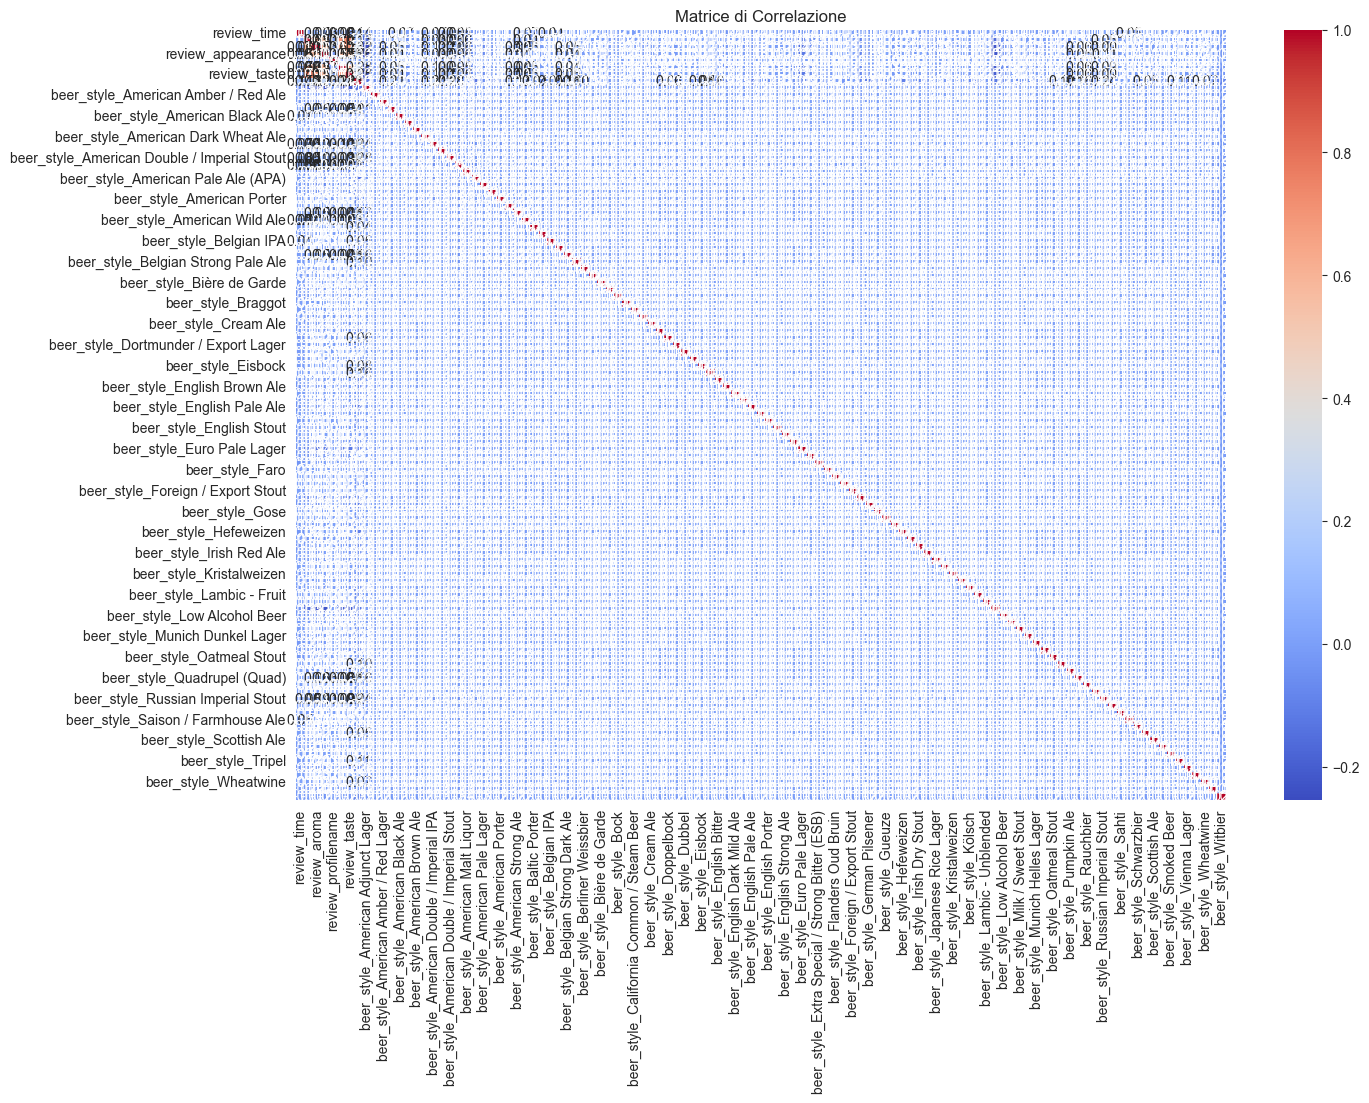

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
correlation_matrix = data.corr()

# Visualizza la heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice di Correlazione")
plt.show()


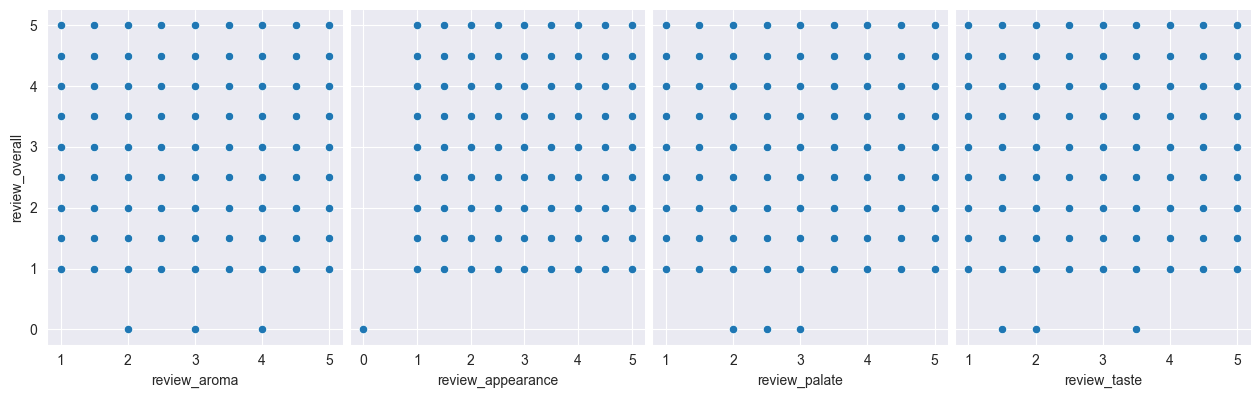

In [6]:
sns.pairplot(data, x_vars=['review_aroma', 'review_appearance', 'review_palate', 'review_taste'], y_vars='review_overall', height=4, aspect=0.8)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Separa le feature e la variabile target
X = data.drop(columns=['review_overall'])
y = data['review_overall']

# Suddivisione 80%-20% per training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inizializza il modello di regressione lineare
linear_model = LinearRegression()

# Addestra il modello sui dati di training
linear_model.fit(X_train, y_train)

# Predizione sui dati di test
y_pred = linear_model.predict(X_test)

# Calcola le metriche di valutazione
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.16582236458164493
R-squared (R²): 0.6801434900038166


In [9]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge MSE: {mse_ridge}")
print(f"Ridge R-squared (R²): {r2_ridge}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso MSE: {mse_lasso}")
print(f"Lasso R-squared (R²): {r2_lasso}")


C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.25239e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge MSE: 0.16582231820286344
Ridge R-squared (R²): 0.6801435794643378
Lasso MSE: 0.20099751370575453
Lasso R-squared (R²): 0.6122937734362215


In [10]:
# Stampa i coefficienti delle feature nel modello Lasso
feature_importance = pd.Series(lasso_model.coef_, index=X_train.columns)
significant_features = feature_importance[feature_importance != 0]
print("Feature Importances (Lasso):")
print(significant_features.sort_values(ascending=False))


Feature Importances (Lasso):
review_taste          5.003653e-01
review_palate         1.324675e-01
review_profilename    3.754603e-07
review_time          -9.111419e-12
dtype: float64


In [11]:
from sklearn.model_selection import GridSearchCV

# Definisci i parametri per la ricerca
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}

# Grid Search per Ridge
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X_train, y_train)
print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge R²:", ridge_grid.best_score_)

# Grid Search per Lasso
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)
print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso R²:", lasso_grid.best_score_)


C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.13639e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.1386e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.12311e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.20987e-21): result may not be accu

Best Ridge alpha: {'alpha': 10.0}
Best Ridge R²: 0.6789503561352859
Best Lasso alpha: {'alpha': 0.001}
Best Lasso R²: 0.67448087746887


In [12]:
from sklearn.model_selection import GridSearchCV

# Definisci i parametri per la ricerca
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}

# Grid Search per Ridge
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X_train, y_train)
print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge R²:", ridge_grid.best_score_)

# Grid Search per Lasso
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)
print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso R²:", lasso_grid.best_score_)


C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.13639e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.1386e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.12311e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.20987e-21): result may not be accu

Best Ridge alpha: {'alpha': 10.0}
Best Ridge R²: 0.6789503561352859
Best Lasso alpha: {'alpha': 0.001}
Best Lasso R²: 0.67448087746887
